## Reading in the Data

In [1]:
library(readxl)

In [2]:
car = read_excel("C:/Users/student/Desktop/Fall 2018/R Class/Datasets/c2015.xlsx")
library(ggplot2)

In [3]:
library(caret)

Loading required package: lattice


In [4]:
library(ranger)

## Handeling Missing Data

In [5]:
sum(is.na(car))

[1] 37320

In [6]:
summary(car)

    STATE              ST_CASE           VEH_NO           PER_NO      
 Length:80587       Min.   : 10001   Min.   : 0.000   Min.   : 1.000  
 Class :character   1st Qu.:121977   1st Qu.: 1.000   1st Qu.: 1.000  
 Mode  :character   Median :270282   Median : 1.000   Median : 1.000  
                    Mean   :275607   Mean   : 1.389   Mean   : 1.629  
                    3rd Qu.:420645   3rd Qu.: 2.000   3rd Qu.: 2.000  
                    Max.   :560130   Max.   :58.000   Max.   :51.000  
                                                                      
     COUNTY            DAY           MONTH                HOUR      
 Min.   :  1.00   Min.   : 1.00   Length:80587       Min.   : 0.00  
 1st Qu.: 31.00   1st Qu.: 8.00   Class :character   1st Qu.: 8.00  
 Median : 71.00   Median :15.00   Mode  :character   Median :15.00  
 Mean   : 91.72   Mean   :15.52                      Mean   :14.01  
 3rd Qu.:115.00   3rd Qu.:23.00                      3rd Qu.:19.00  
 Max.   :999.00   

In [7]:
library(kwes1)
car = quick_clean(car,1)
sum(is.na(car))

[1] 0

In [8]:
levels(car$INJ_SEV) = c("D", "D", "A", "A", "A", "A", "D", "A")

## Data Exploration and Visualization

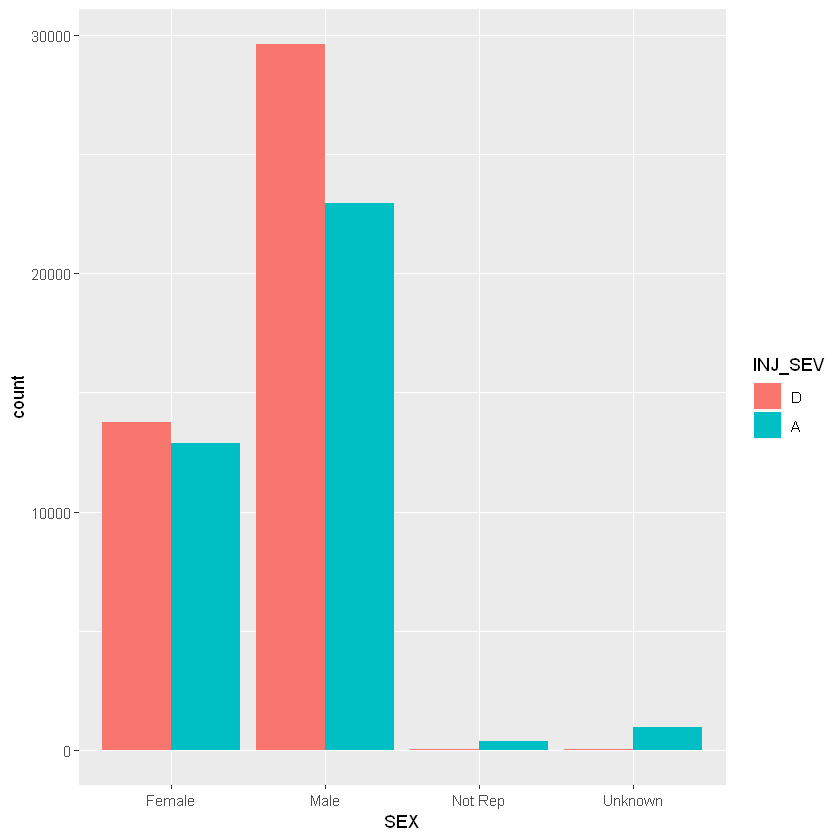

[[1]]

[[2]]

[[3]]


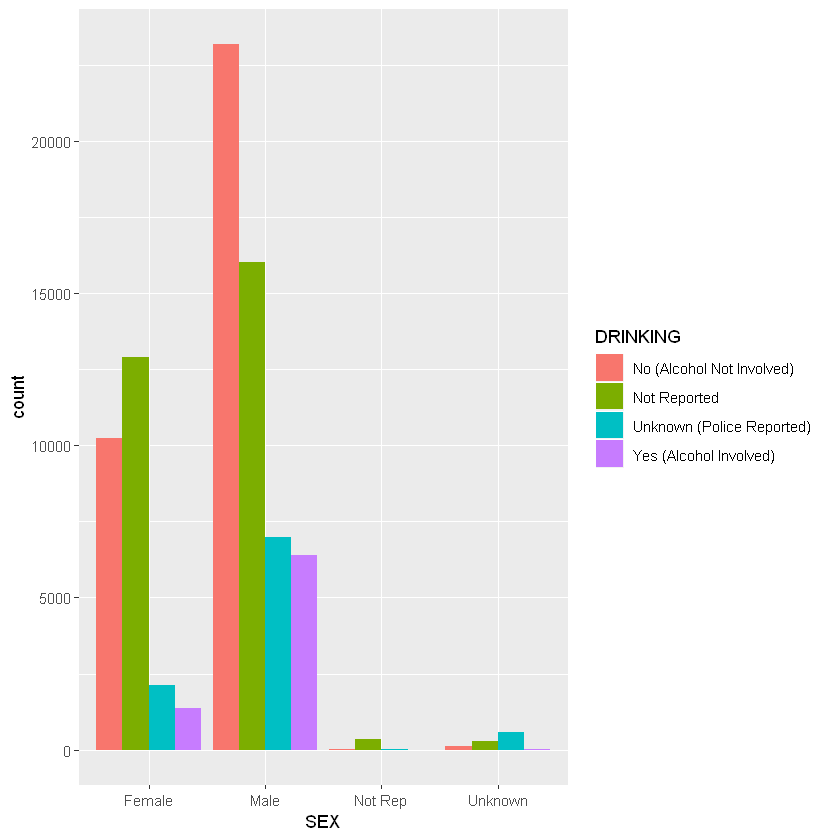

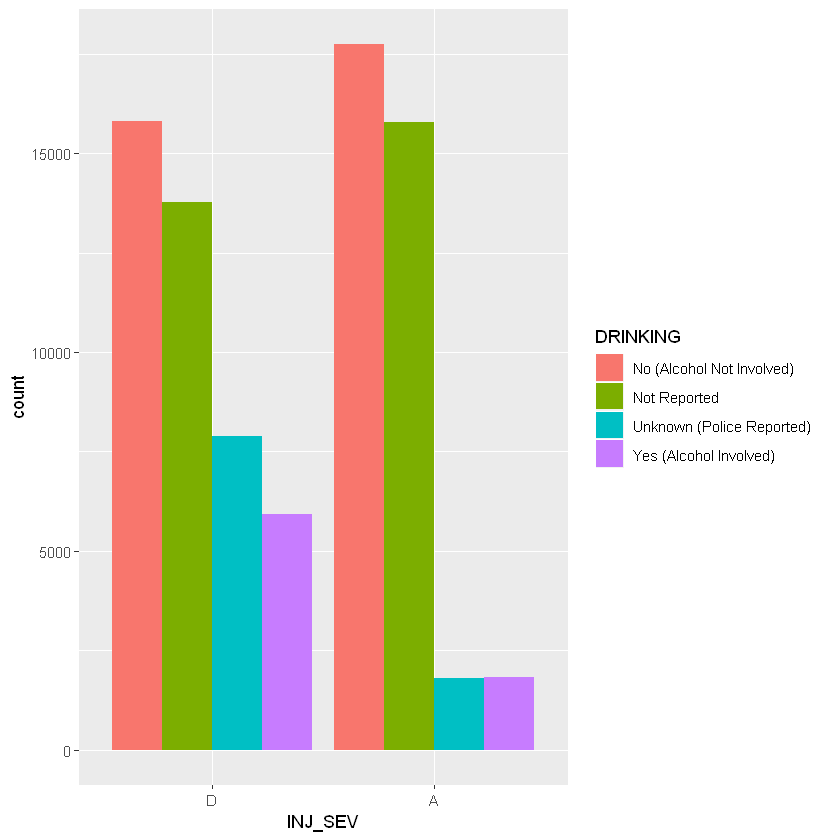

In [9]:
quick_visual(car,1)

## Working with the Target Variable

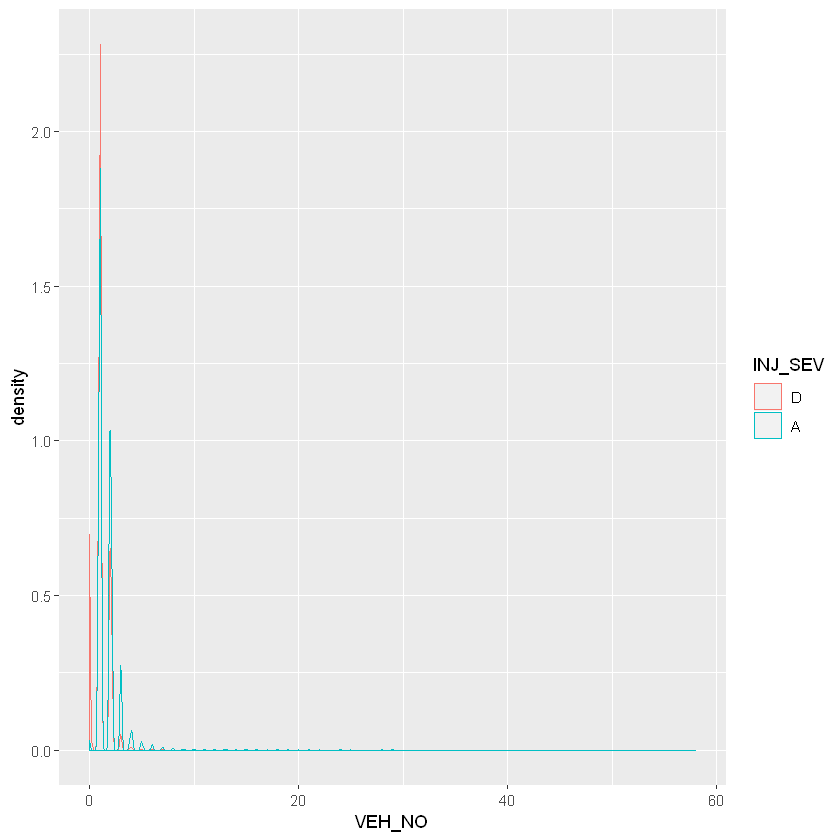

In [10]:
ggplot(car) + geom_density(mapping = aes(x = VEH_NO, color = INJ_SEV))

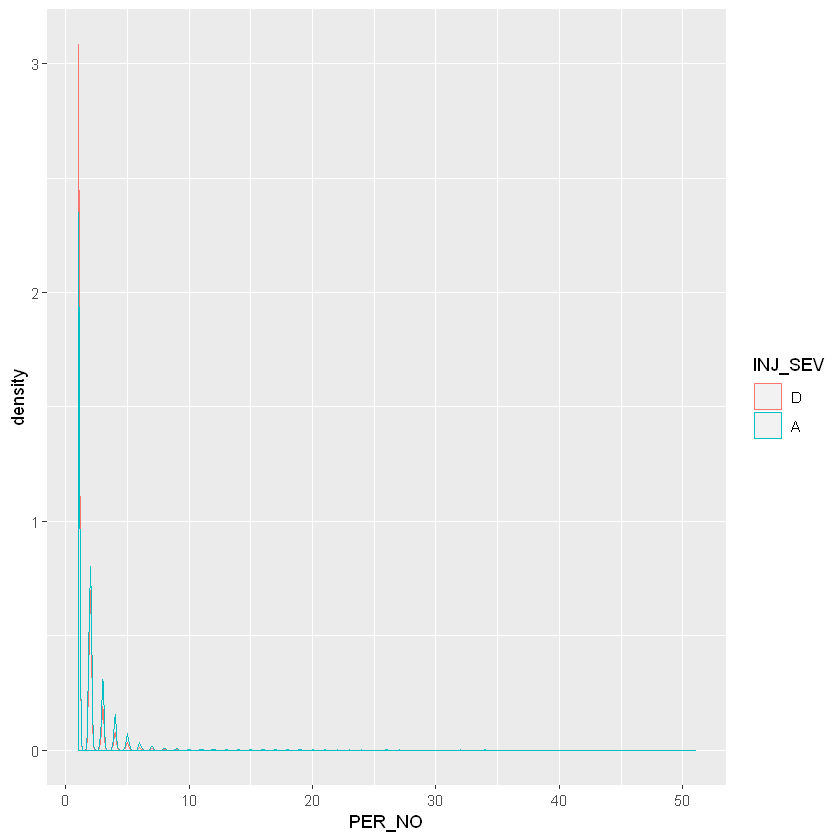

In [11]:
ggplot(car) + geom_density(mapping = aes(x = PER_NO, color = INJ_SEV))

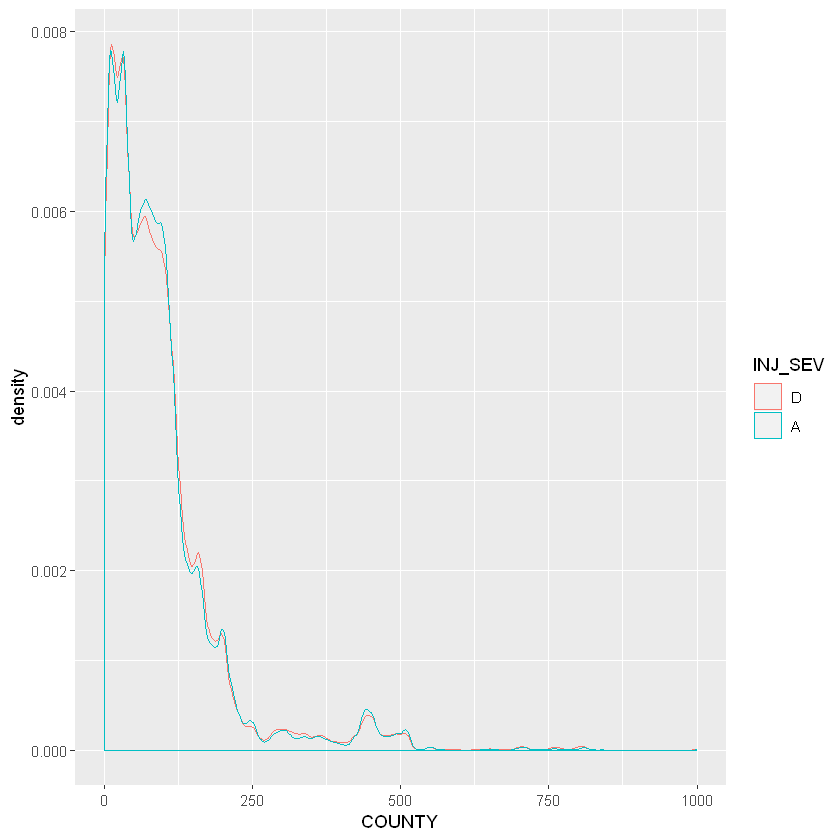

In [12]:
ggplot(car) + geom_density(mapping = aes(x = COUNTY, color = INJ_SEV))

Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."

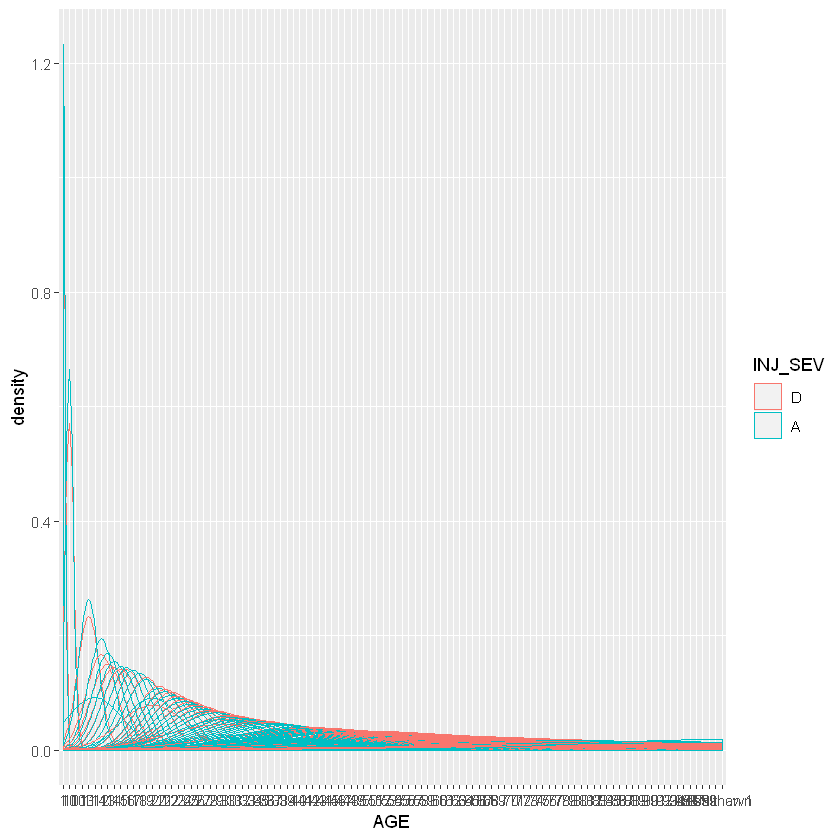

In [13]:
ggplot(car) + geom_density(mapping = aes(x = AGE, color = INJ_SEV))

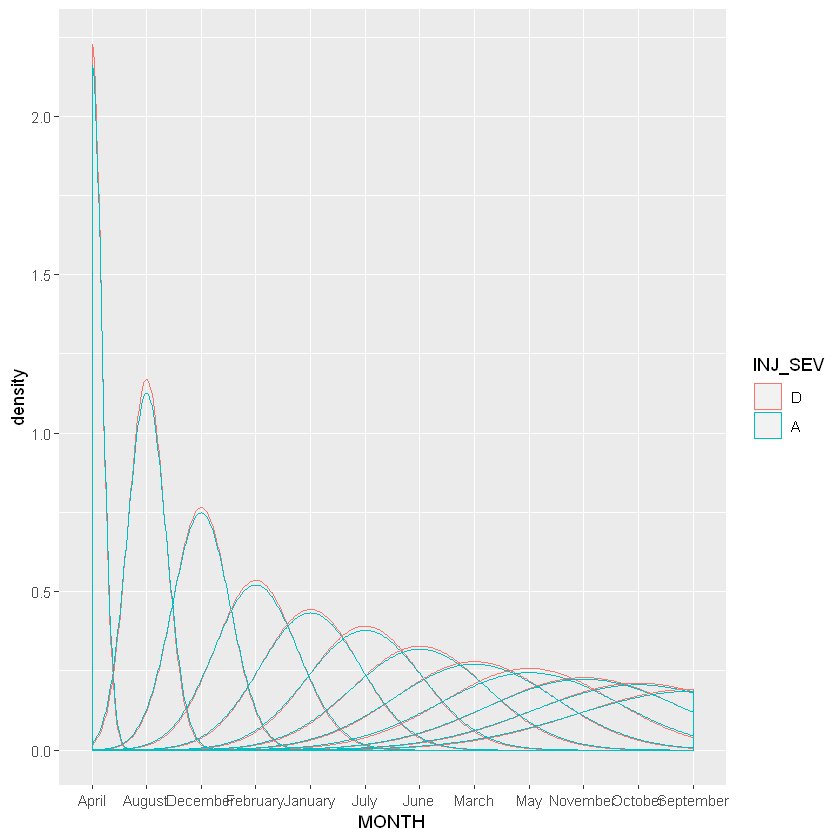

In [14]:
ggplot(car) + geom_density(mapping = aes(x = MONTH, color = INJ_SEV))

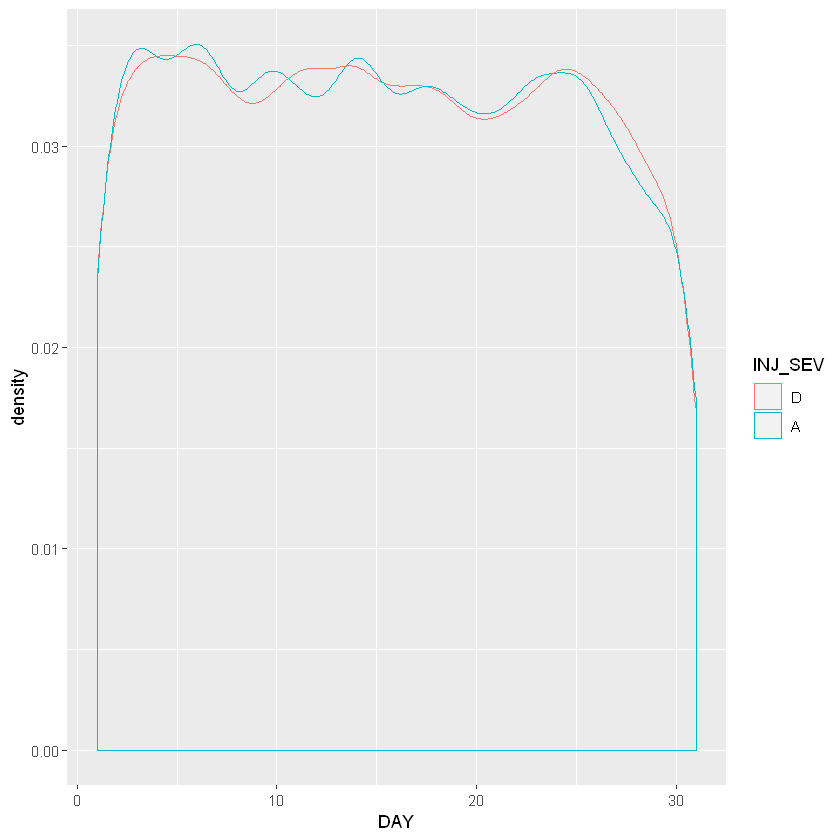

In [15]:
ggplot(car) + geom_density(mapping = aes(x = DAY, color = INJ_SEV))

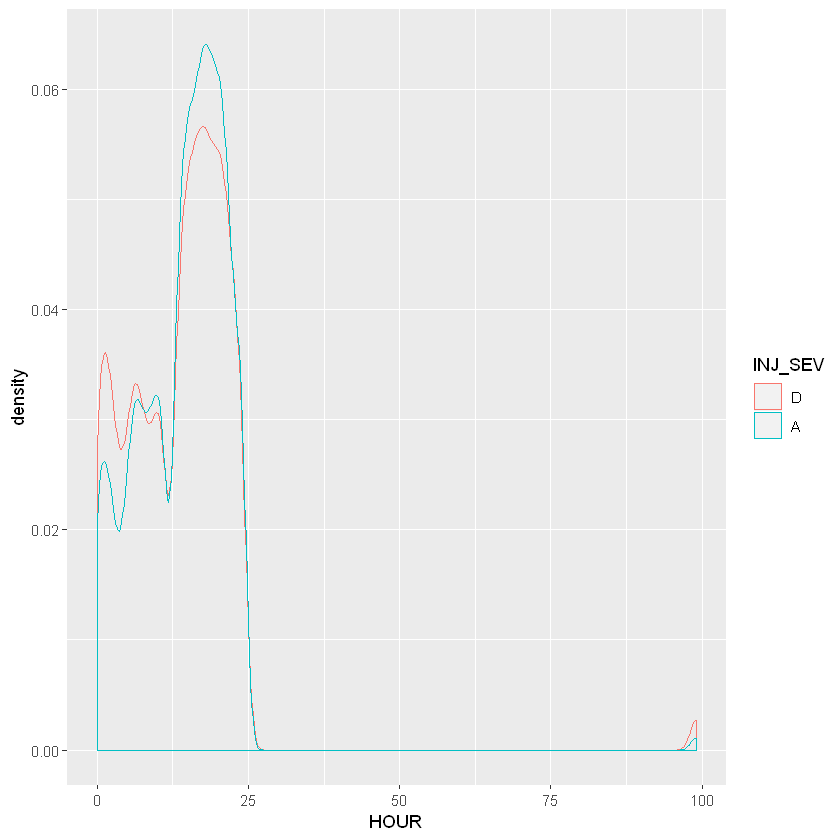

In [16]:
ggplot(car) + geom_density(mapping = aes(x = HOUR, color = INJ_SEV))

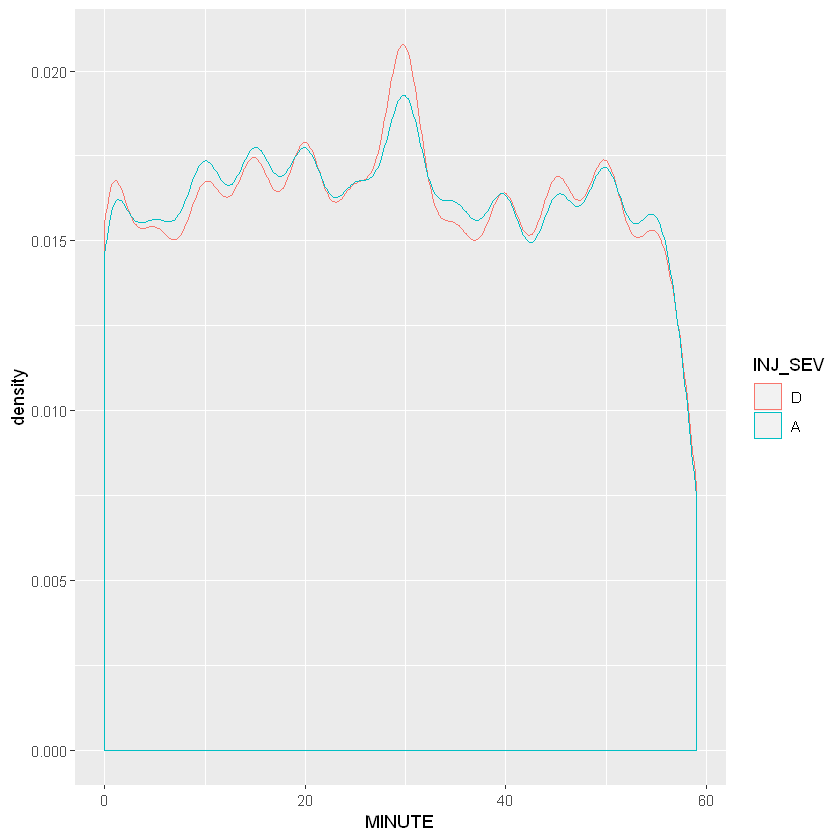

In [17]:
ggplot(car) + geom_density(mapping = aes(x = MINUTE, color = INJ_SEV))

## Handeling the Imbalance of the Target

### There is no imbalance.

## Building and Tuning Predictive Models

In [18]:
nr = nrow(car)
ra = sample(1:nr, 1000)
car1 = car[ra,]
quick_model(car1,13)

[1] 0.5219994

In [19]:
myGrid = expand.grid(mtry = 5, splitrule = c("gini", "extratrees"), min.node.size = c(1:5))
model = train(INJ_SEV ~ ., car1, method = "ranger", trControl = trainControl(method = "cv", number = 7), tuneGrid = myGrid)
max(model$results$Accuracy)

[1] 0.724902

In [20]:
myGrid = expand.grid(mtry = 15, splitrule = c("gini"), min.node.size = c(1:15))
model = train(INJ_SEV ~ ., car1, method = "ranger", trControl = trainControl(method = "cv", number = 7), tuneGrid = myGrid)
max(model$results$Accuracy)

[1] 0.7810087